<a href="https://colab.research.google.com/github/aliciama16/soviet-space-dreams/blob/main/UMAP_%26_K_MEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import numpy as np
import cv2
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
from google.colab import drive

drive.mount('/content/drive')

posters_folder = "/content/drive/MyDrive/❄️ Winter 2025/DH201: Intro to Digital Humanities/Final Project/USSR Posters"
magazines_folder = "/content/drive/MyDrive/❄️ Winter 2025/DH201: Intro to Digital Humanities/Final Project/Tekhnika Molodezhi/Tekhnika Molodezhi Posters"

import os

valid_extensions = {".jpg", ".jpeg", ".png", ".webp", ".tiff", ".bmp"}

def is_image_file(filename):
    return any(filename.lower().endswith(ext) for ext in valid_extensions)

image_paths = []
features = []
labels = []  #poster or magazine

for folder, label in [(posters_folder, "poster"), (magazines_folder, "magazine")]:
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)

        # kip non-image files
        if not is_image_file(filename):
            print(f"Skipping non-image file: {filename}")
            continue

        try:
            img_features = extract_features(img_path)
            features.append(img_features)
            image_paths.append(img_path)
            labels.append(label)
        except Exception as e:
            print(f"Error processing {img_path}: {e}")


#load ResNet50
model = models.resnet50(pretrained=True)
model = torch.nn.Sequential(*list(model.children())[:-1])  #remove classification layer
model.eval()

#image preprocessing function
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

#extract image features
def extract_features(image_path):
    img = Image.open(image_path).convert("RGB")
    img = transform(img).unsqueeze(0)  # Add batch dimension
    with torch.no_grad():
        features = model(img).flatten().numpy()
    return features

#process from both folders
image_paths = []
features = []
labels = []

for folder, label in [(posters_folder, "poster"), (magazines_folder, "magazine")]:
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img_features = extract_features(img_path)
            features.append(img_features)
            image_paths.append(img_path)
            labels.append(label)
        except Exception as e:
            print(f"Error processing {img_path}: {e}")

#convert to NumPy array
features = np.array(features)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Error processing /content/drive/MyDrive/❄️ Winter 2025/DH201: Intro to Digital Humanities/Final Project/USSR Posters/61wlFjNdRTL._AC_SL1001_.jpg: name 'extract_features' is not defined
Error processing /content/drive/MyDrive/❄️ Winter 2025/DH201: Intro to Digital Humanities/Final Project/USSR Posters/85601835_1024-poster-5-full.jpg: name 'extract_features' is not defined
Error processing /content/drive/MyDrive/❄️ Winter 2025/DH201: Intro to Digital Humanities/Final Project/USSR Posters/85601396_1024-poster-3-full-1.jpg: name 'extract_features' is not defined
Error processing /content/drive/MyDrive/❄️ Winter 2025/DH201: Intro to Digital Humanities/Final Project/USSR Posters/soviet-space-program-propaganda-poster-9.jpg: name 'extract_features' is not defined
Error processing /content/drive/MyDrive/❄️ Winter 2025/DH201: Intro to Digital Humanities/Final Project/

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:01<00:00, 87.7MB/s]


Error processing /content/drive/MyDrive/❄️ Winter 2025/DH201: Intro to Digital Humanities/Final Project/Tekhnika Molodezhi/Tekhnika Molodezhi Posters/Articles: [Errno 21] Is a directory: '/content/drive/MyDrive/❄️ Winter 2025/DH201: Intro to Digital Humanities/Final Project/Tekhnika Molodezhi/Tekhnika Molodezhi Posters/Articles'


**ResNet + UMAP Visualization of Posters & Magazines**

This visualization shows a UMAP projection, but instead of dots, each image is populated, reflecting how similar images are grouped.

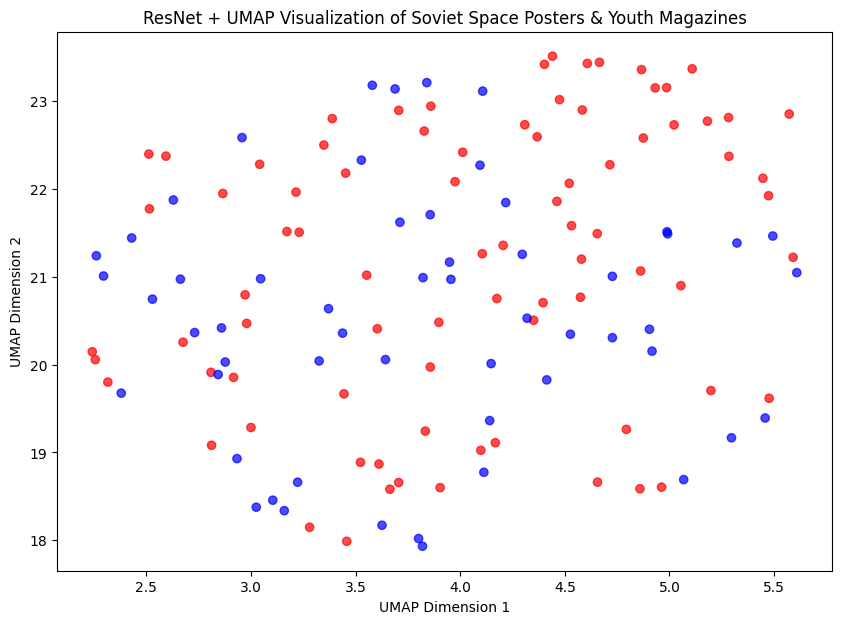

In [7]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns

#reduce to 2D using UMAP
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean')
umap_embeddings = umap_model.fit_transform(features)

#convert labels into color mapping
colors = ["red" if label == "poster" else "blue" for label in labels]

plt.figure(figsize=(10, 7))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=colors, alpha=0.7)
plt.title("ResNet + UMAP Visualization of Soviet Space Posters & Youth Magazines")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()


**UMAP Visualization of Soviet Posters & Magazines with Embedded Images**

This visualization shows a UMAP projection, but instead of dots, each image is embedded at its corresponding location in 2D space, reflecting how similar images are grouped. No clustering  has been applied yet. This shows how UMAP organizes the images based on their visual relationships

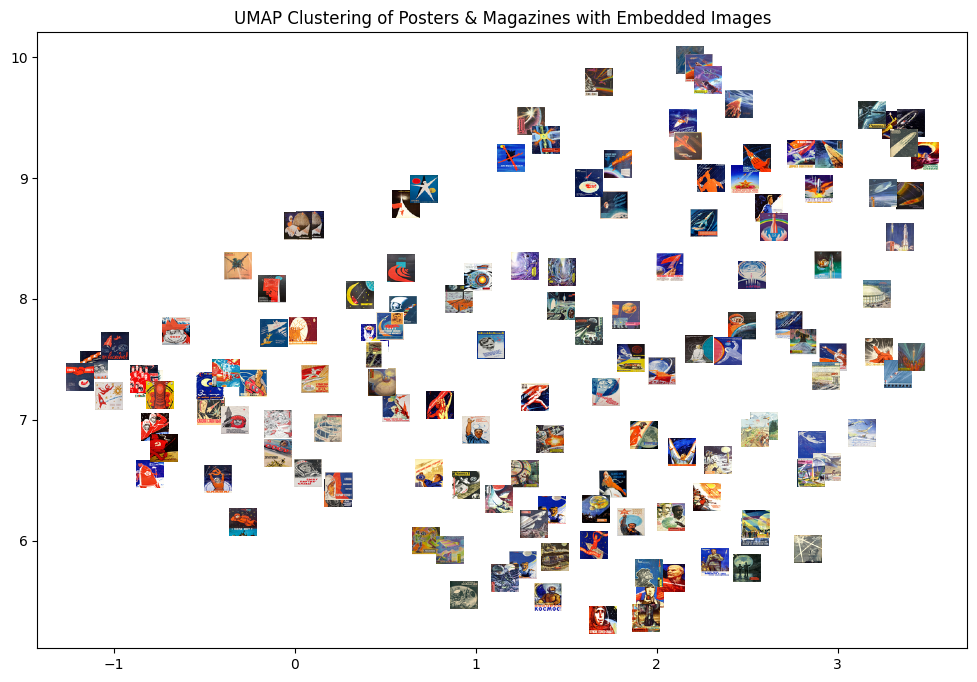

In [4]:
import umap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import os

#read and resize images
def get_thumbnail(path, size=(40, 40)):
    img = Image.open(path)
    img = img.resize(size, Image.LANCZOS)
    return np.array(img)

#fit UMAP on extracted features
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean')
umap_embeddings = umap_model.fit_transform(features)

#plot UMAP with images
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], alpha=0.3)

for i, path in enumerate(image_paths):
    img = get_thumbnail(path)
    imagebox = OffsetImage(img, zoom=0.5)
    ab = AnnotationBbox(imagebox, (umap_embeddings[i, 0], umap_embeddings[i, 1]), frameon=False)
    ax.add_artist(ab)

plt.title("UMAP Clustering of Posters & Magazines with Embedded Images")
plt.show()


**UMAP-Based Image Mapping with Proximity-Based Connections**

This visualization adds colored borders to distinguish between government-issued state posters (red) and the magazines (blue) as well as connection lines between images.  The connection lines were determined using KDTree nearest neighbor which finds the 5 closest images for each point and draws a connection line if they are within a certain distance.

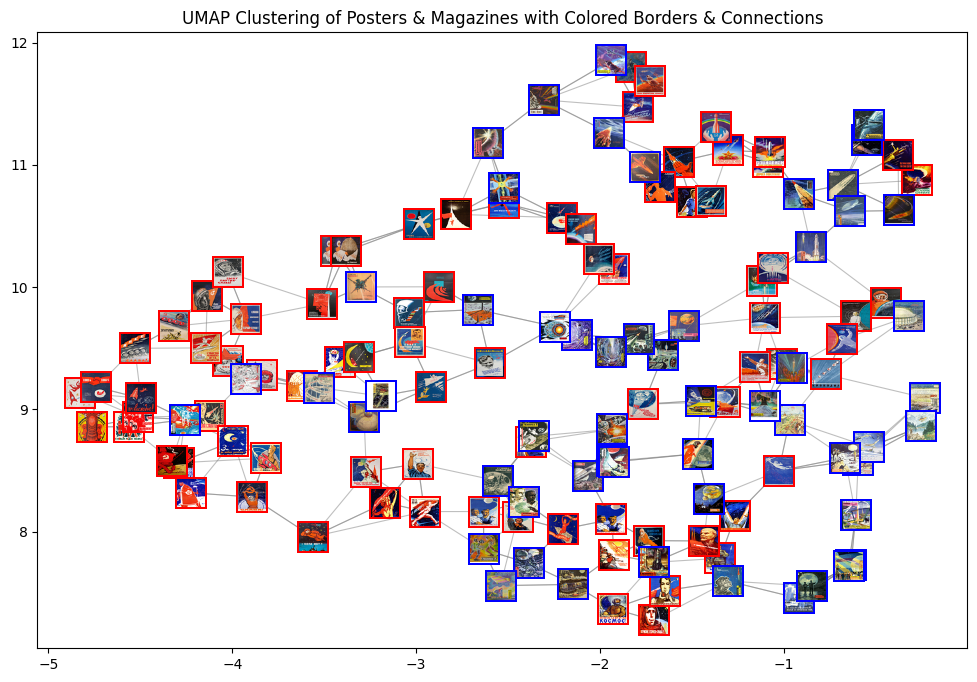

In [5]:
import umap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import os

#read and resize images + border
def get_thumbnail_with_border(path, label, size=(40, 40), border_thickness=3):
    img = Image.open(path).convert("RGB")
    img = img.resize(size, Image.LANCZOS)

    #border color based on category
    border_color = (255, 0, 0) if label == "poster" else (0, 0, 255)  # Red for posters, Blue for magazines

    #create a new image with a border
    bordered_img = Image.new("RGB", (size[0] + 2 * border_thickness, size[1] + 2 * border_thickness), border_color)
    bordered_img.paste(img, (border_thickness, border_thickness))

    return np.array(bordered_img)

#fit UMAP on extracted features
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean')
umap_embeddings = umap_model.fit_transform(features)

#plot UMAP with images
fig, ax = plt.subplots(figsize=(12, 8))

#invisible points scatter plot base layer
ax.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], alpha=0.0)  # Hidden points to set the scale

#draw connections based on proximity
from scipy.spatial import KDTree

tree = KDTree(umap_embeddings)  #KDTree for fast nearest neighbor search
threshold_distance = 2.5  #how close do i want clusters to connect

edges = []
for i in range(len(umap_embeddings)):
    distances, indices = tree.query(umap_embeddings[i], k=5)  #5 nearest neighbors
    for j in indices:
        if j != i and np.linalg.norm(umap_embeddings[i] - umap_embeddings[j]) < threshold_distance:
            edges.append((i, j))

#edges
for i, j in edges:
    ax.plot([umap_embeddings[i, 0], umap_embeddings[j, 0]],
            [umap_embeddings[i, 1], umap_embeddings[j, 1]],
            color="gray", alpha=0.5, linewidth=0.8)

#images with colored borders
for i, path in enumerate(image_paths):
    img = get_thumbnail_with_border(path, labels[i])
    imagebox = OffsetImage(img, zoom=0.5)
    ab = AnnotationBbox(imagebox, (umap_embeddings[i, 0], umap_embeddings[i, 1]), frameon=False)
    ax.add_artist(ab)

plt.title("UMAP Clustering of Posters & Magazines with Colored Borders & Connections")
plt.show()


**UMAP + K-Means Clustering of Posters & Magazines**

Instead of just positioning the images based on similarity, this groups them into three clusters using K-Means clustering.

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


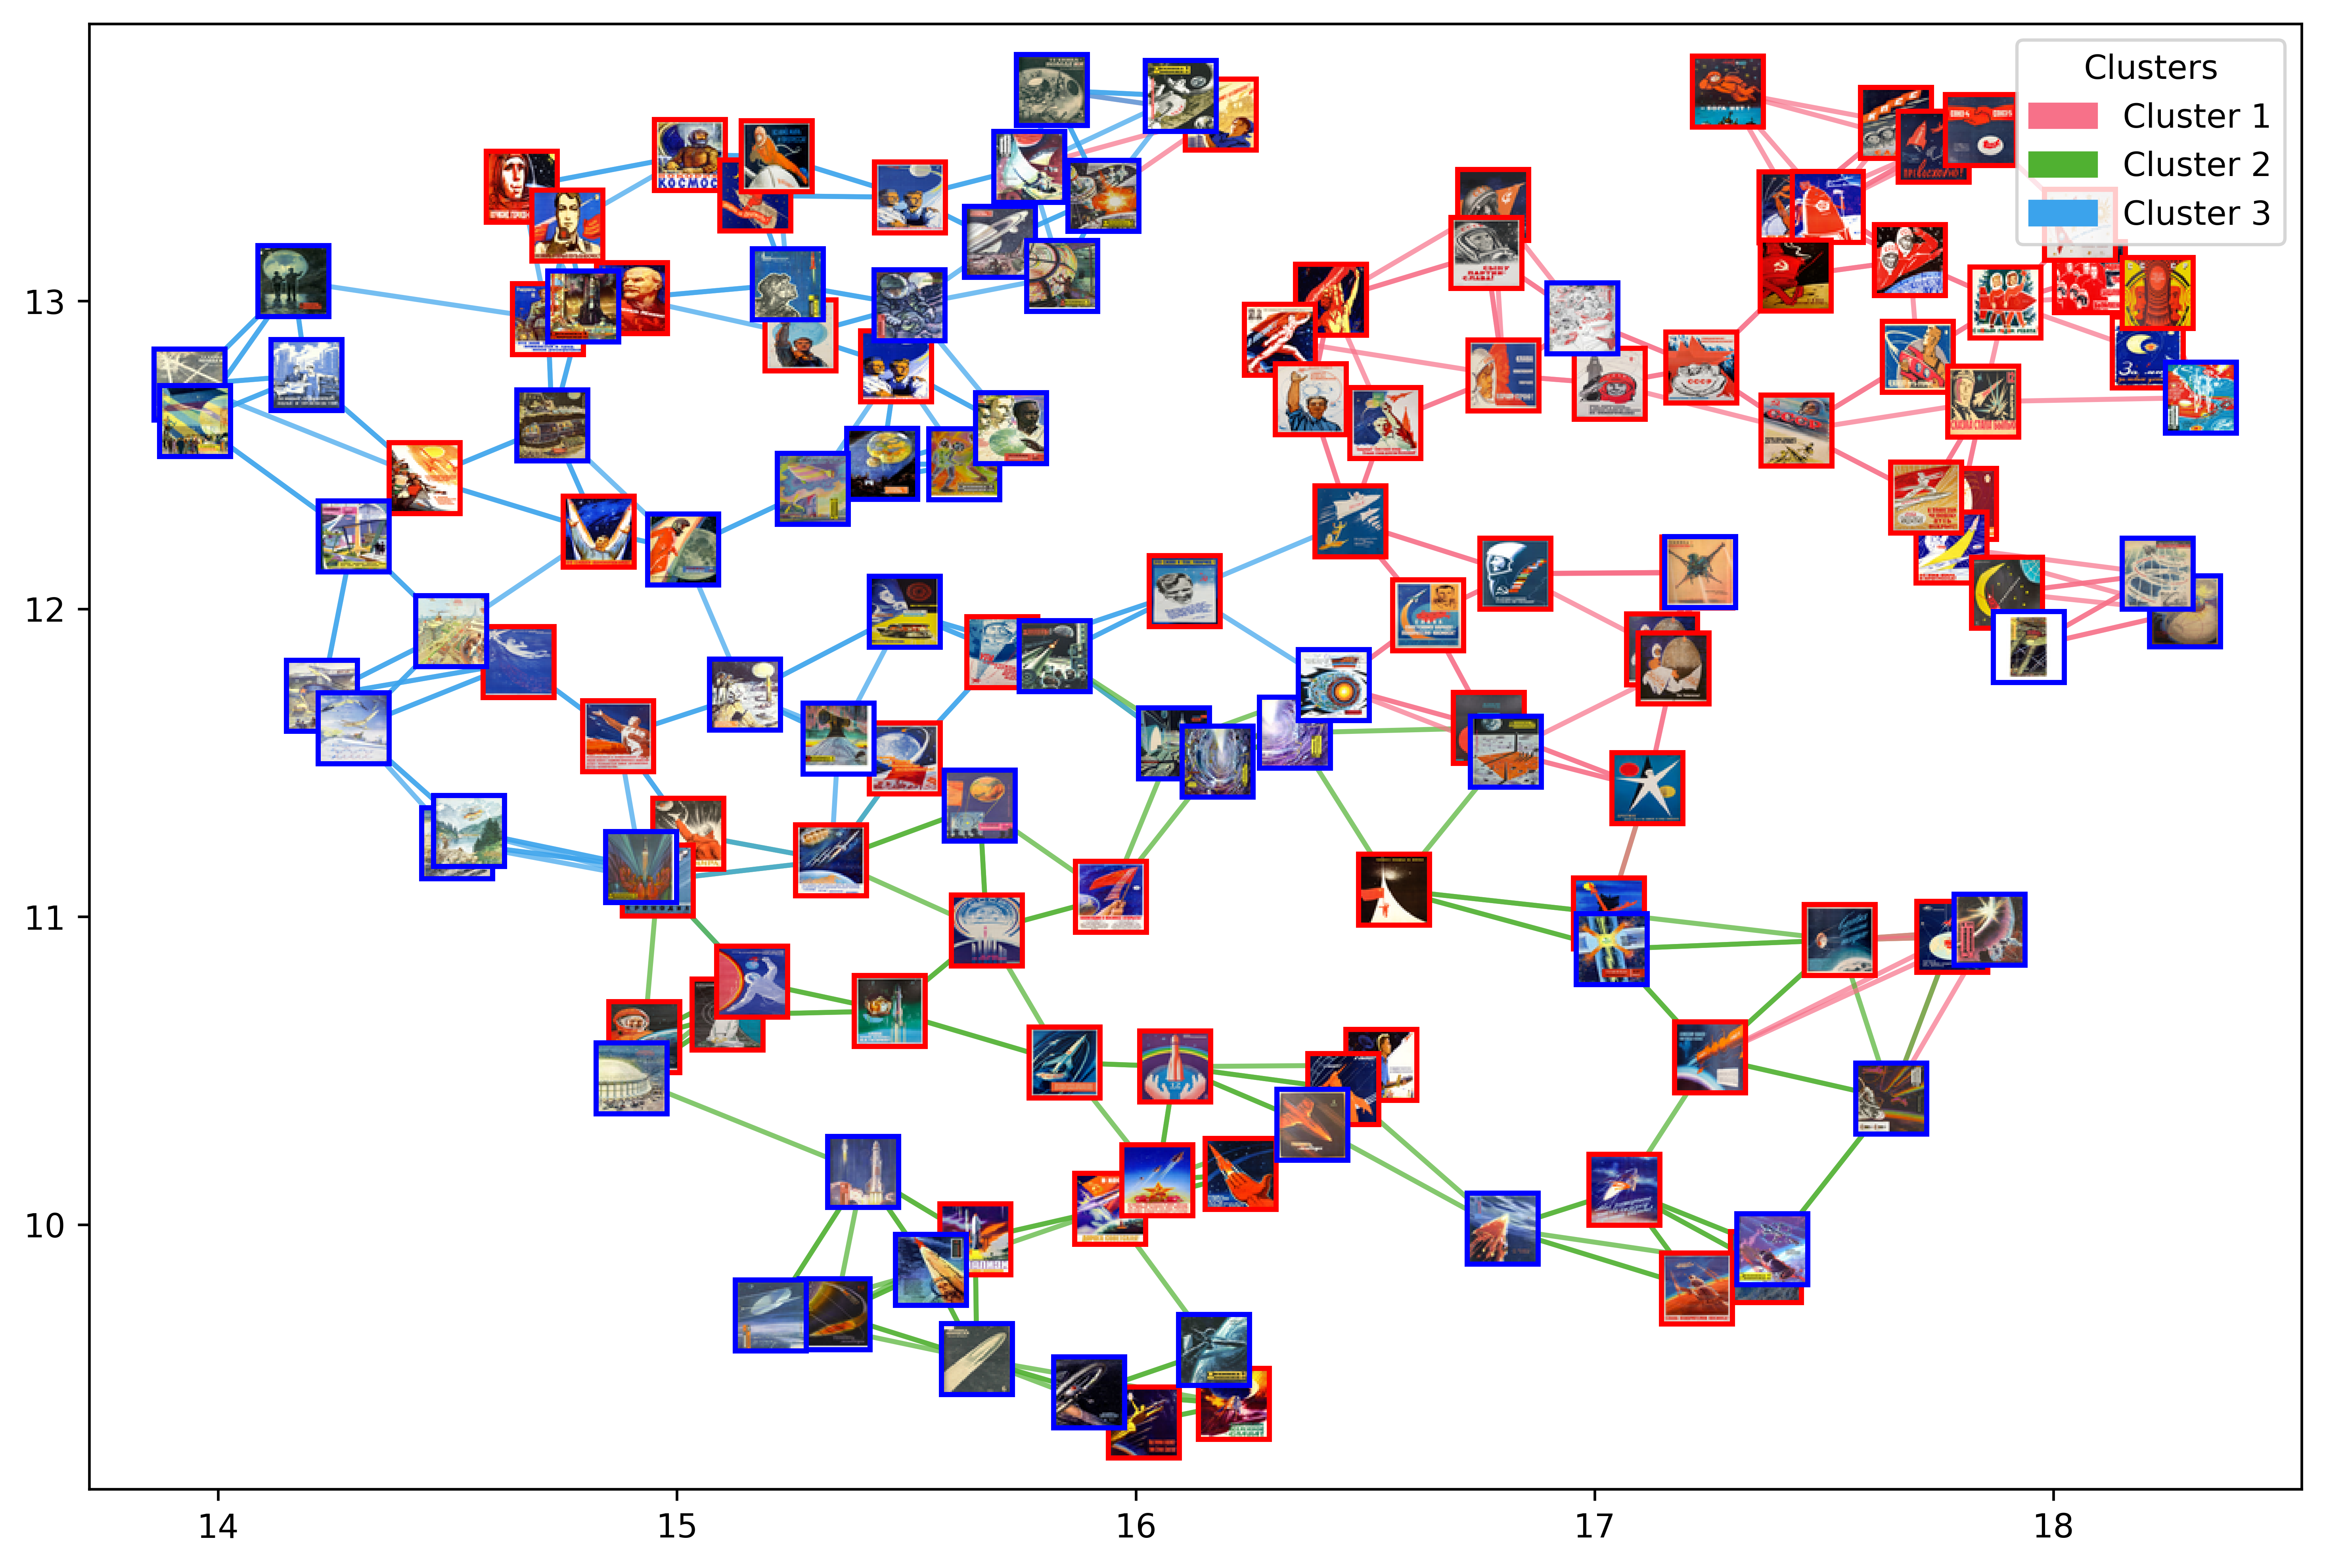

In [6]:
import umap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import os
from scipy.spatial import KDTree
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.patches as mpatches

#read and resize images with a border
def get_thumbnail_with_border(path, label, size=(40, 40), border_thickness=3):  #match original size
    img = Image.open(path).convert("RGB")
    img = img.resize(size, Image.LANCZOS)

    #border color based on category
    border_color = (255, 0, 0) if label == "poster" else (0, 0, 255)  # Red for posters, Blue for magazines

    #new image with a border
    bordered_img = Image.new("RGB", (size[0] + 2 * border_thickness, size[1] + 2 * border_thickness), border_color)
    bordered_img.paste(img, (border_thickness, border_thickness))

    return np.array(bordered_img)

#fit UMAP on extracted features
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean')
umap_embeddings = umap_model.fit_transform(features)

#K-Means Clustering to determine groups
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(umap_embeddings)

#distinct colors for each cluster
cluster_colors = sns.color_palette("husl", num_clusters)
cluster_color_map = {i: cluster_colors[i] for i in range(num_clusters)}

#KDTree for nearest neighbor search
tree = KDTree(umap_embeddings)
threshold_distance = 2.5

edges = []
edge_colors = []
for i in range(len(umap_embeddings)):
    distances, indices = tree.query(umap_embeddings[i], k=5)
    for j in indices:
        if j != i and np.linalg.norm(umap_embeddings[i] - umap_embeddings[j]) < threshold_distance:
            edges.append((i, j))
            edge_colors.append(cluster_color_map[cluster_labels[i]])

#high-resolution figure
fig, ax = plt.subplots(figsize=(12, 8), dpi=600)  # Keep original size, just higher DPI

#scatter plot base layer with cluster colors
ax.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], alpha=0.0)  # Hidden points to set the scale

#different color edges
for (i, j), edge_color in zip(edges, edge_colors):
    ax.plot([umap_embeddings[i, 0], umap_embeddings[j, 0]],
            [umap_embeddings[i, 1], umap_embeddings[j, 1]],
            color=edge_color, alpha=0.7, linewidth=1.5)

#images with colored borders
for i, path in enumerate(image_paths):
    img = get_thumbnail_with_border(path, labels[i], size=(40, 40))  #match original size
    imagebox = OffsetImage(img, zoom=0.5)  #match original zoom
    ab = AnnotationBbox(imagebox, (umap_embeddings[i, 0], umap_embeddings[i, 1]), frameon=False)
    ax.add_artist(ab)

#legend
legend_patches = [mpatches.Patch(color=cluster_colors[i], label=f'Cluster {i+1}') for i in range(num_clusters)]
ax.legend(handles=legend_patches, title="Clusters", loc="upper right", fontsize=10)

#fit UMAP on extracted features
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', random_state=42)
umap_embeddings = umap_model.fit_transform(features)

#save high-res image
plt.savefig("UMAP_Clustering_HighRes.png", dpi=600, bbox_inches="tight")  # High-res PNG
plt.savefig("UMAP_Clustering_HighRes.pdf", bbox_inches="tight")  # Scalable vector PDF
plt.savefig("UMAP_Clustering_HighRes.svg", bbox_inches="tight")  # Scalable SVG for web use

plt.show()
